In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from scipy.misc import imread

#import tensorflow as tf
sns.set()

# Trying to process some loops in parallel to make things faster
from joblib import Parallel, delayed
import multiprocessing

import os
print(os.listdir("../all"))

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

['.git', '.ipynb_checkpoints', 'cs412-protein-analysis (1).ipynb', 'README.md', 'sample_submission.csv', 'test', 'train', 'train.csv']


In [9]:
train_labels = pd.read_csv("../all/train.csv")
train_labels.head(10)

,Id,Target
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18
5,001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0,0
6,0020af02-bbba-11e8-b2ba-ac1f6b6435d0,25 2
7,002679c2-bbb6-11e8-b2ba-ac1f6b6435d0,0
8,00285ce4-bba0-11e8-b2b9-ac1f6b6435d0,2 0
9,002daad6-bbc9-11e8-b2bc-ac1f6b6435d0,7


In [10]:
train_labels["Target"].size

31072

In [11]:
path = "../all/train"

images = os.listdir(path)

def process_file(file_name):
    if "green" in file_name:
        return imread(path + "/" + file_name)
    
num_cores = multiprocessing.cpu_count()

binary_images = Parallel(n_jobs=num_cores)(delayed(process_file)(i) for i in images[1:400])

# for i in range(len(os.listdir(path))):
#     temp = os.listdir(path)[i]
#     if i % 100 == 0:
#         print(str(i) + "/" + str(len(os.listdir(path))))
#     if "green" in temp: 
#         images.append(imread(path + "/" + temp))

        
# # what are your inputs, and what operation do you want to 
# # perform on each input. For example...
# inputs = range(10) 
# def processInput(i):
#     return i * i
 
# num_cores = multiprocessing.cpu_count()
     
# results = Parallel(n_jobs=num_cores)(delayed(processInput)(i) for i in inputs)

In [12]:
print(len(binary_images))

399


In [13]:
print(binary_images[0])
print(binary_images[1])
print(binary_images[2])
print(binary_images[3])

print(binary_images[4])
print(binary_images[5])
print(binary_images[6])
print(binary_images[7])

print(len(binary_images))

playing = binary_images

print(len(playing))

playing = list(filter(lambda x: x is not None, playing))
print(len(playing))

print(playing[0])
print(playing[1])

# for i in range(len(binary_images)):
#     if binary_images[i] is None:
#         binary_images.pop(0)
        
# print(str(len(binary_images)))
# print(binary_images[0])

[[ 9  6 27 ...  1  0  0]
 [ 3 20 20 ...  0  0  0]
 [52 15 36 ... 17  0  0]
 ...
 [10  0  2 ...  4  0  2]
 [14  4  3 ...  0 15  1]
 [ 1 16  1 ...  0  9  0]]
None
None
None
[[1 1 1 ... 0 1 4]
 [1 0 0 ... 0 0 1]
 [2 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 2]
 [0 0 0 ... 9 0 0]
 [0 0 0 ... 0 5 5]]
None
None
None
399
399
100
[[ 9  6 27 ...  1  0  0]
 [ 3 20 20 ...  0  0  0]
 [52 15 36 ... 17  0  0]
 ...
 [10  0  2 ...  4  0  2]
 [14  4  3 ...  0 15  1]
 [ 1 16  1 ...  0  9  0]]
[[1 1 1 ... 0 1 4]
 [1 0 0 ... 0 0 1]
 [2 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 2]
 [0 0 0 ... 9 0 0]
 [0 0 0 ... 0 5 5]]


In [14]:
label_names = {
    0:  "Nucleoplasm",  
    1:  "Nuclear membrane",   
    2:  "Nucleoli",   
    3:  "Nucleoli fibrillar center",   
    4:  "Nuclear speckles",
    5:  "Nuclear bodies",   
    6:  "Endoplasmic reticulum",   
    7:  "Golgi apparatus",   
    8:  "Peroxisomes",   
    9:  "Endosomes",   
    10:  "Lysosomes",   
    11:  "Intermediate filaments",   
    12:  "Actin filaments",   
    13:  "Focal adhesion sites",   
    14:  "Microtubules",   
    15:  "Microtubule ends",   
    16:  "Cytokinetic bridge",   
    17:  "Mitotic spindle",   
    18:  "Microtubule organizing center",   
    19:  "Centrosome",   
    20:  "Lipid droplets",   
    21:  "Plasma membrane",   
    22:  "Cell junctions",   
    23:  "Mitochondria",   
    24:  "Aggresome",   
    25:  "Cytosol",   
    26:  "Cytoplasmic bodies",   
    27:  "Rods & rings"
}

def fill_targets(row):
    row.Target = np.array(row.Target.split(" ")).astype(np.int)
    for num in row.Target:
        name = label_names[int(num)]
        row.loc[name] = 1
    return row

for key in label_names.keys():
    train_labels[label_names[key]] = 0
    
train_labels = train_labels.apply(fill_targets, axis=1)
train_labels.head(10)

,Id,Target,Nucleoplasm,Nuclear membrane,Nucleoli,Nucleoli fibrillar center,Nuclear speckles,Nuclear bodies,Endoplasmic reticulum,Golgi apparatus,...,Microtubule organizing center,Centrosome,Lipid droplets,Plasma membrane,Cell junctions,Mitochondria,Aggresome,Cytosol,Cytoplasmic bodies,Rods & rings
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,"[16, 0]",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,"[7, 1, 2, 0]",1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,[5],0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,[1],0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,[18],0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0,[0],1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0020af02-bbba-11e8-b2ba-ac1f6b6435d0,"[25, 2]",0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,002679c2-bbb6-11e8-b2ba-ac1f6b6435d0,[0],1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,00285ce4-bba0-11e8-b2b9-ac1f6b6435d0,"[2, 0]",1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,002daad6-bbc9-11e8-b2bc-ac1f6b6435d0,[7],0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


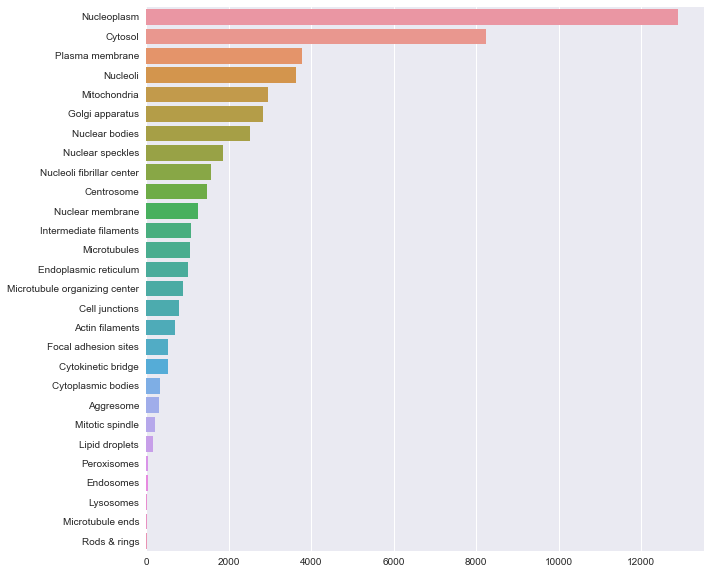

In [15]:
target_counts = train_labels.drop(["Id", "Target"],axis=1).sum(axis=0).sort_values(ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(y=target_counts.index.values, x=target_counts.values, order=target_counts.index)

Things to improve:
1. First convolutional layer 
    * How many channels to start with?
    * What should the kernel size (size of window) be?
    * Strides - does (1,1) make sense?
    * We chose 'relu' as the activation function, what happens if we use something else?
    * Input_shape, should we stick with 512x512? Make it smaller? Could we use an online processing tool to use the full size images? Would this make a difference?
    * Keras takes care of declaring any weights or bias variables - in Tensorflow you need to declare these explicitly. What are the advantages of declaring them explicitly?
2. Maxpooling - should the window size be different?
3. More convolution layers? What should the architecture be?
4. Dense
    * How many nodes should there be? Different than 64?
    * Different activation function?
    * How exactly is the last layer producing a prediction? Can it predict more than one? Is it predicting for all 28 possibilities?
5. This model does not have a Dropout layer, should we add one? How does it work?
6. What improvements can we make to model.compile? I just put in baseline values that should be changed. Defenitly need to change the accuracy measure.
7. model.fit -> What are the best params to set for performance? How does it affect accuracy? Do we want to use a callback? And this needs to be made into a k-fold cross validation split instead of an arbitrary split. Can we use multiprocessing?

In [18]:
# Splitting the data -> this needs to be changed to splitting k-fold
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(playing, train_labels[1:101],
                                                    test_size=0.2, random_state=42)

print("x_train" + str(x_train[0]))

print("x_test" + str(x_test[0]))

print("y_train:")
y_train = y_train.drop(["Id", "Target"], axis=1)
print(y_train.head(1))

print("y_test:")
y_test = y_test.drop(["Id", "Target"], axis=1)

print(y_test.head(1))

x_train[[ 0  0  0 ...  0  0  1]
 [ 0  0  0 ...  0  0  1]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  2  0 ... 42 20 27]
 [ 1  0  4 ... 25 39 27]
 [ 0  0  0 ... 23 29 12]]
x_test[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [23  6 12 ...  0  0  0]
 [12  0  4 ...  0  0  0]
 [24  0  0 ...  0  0  0]]
y_train:
    Nucleoplasm  Nuclear membrane  Nucleoli  Nucleoli fibrillar center  \
56            1                 0         0                          0   

    Nuclear speckles  Nuclear bodies  Endoplasmic reticulum  Golgi apparatus  \
56                 0               0                      0                0   

    Peroxisomes  Endosomes      ...       Microtubule organizing center  \
56            0          0      ...                                   0   

    Centrosome  Lipid droplets  Plasma membrane  Cell junctions  Mitochondria  \
56           0               0                0               0             1   

    Aggresome  Cytosol  Cytoplasmic bodies

In [19]:
import keras
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential

# x size, y size, channels
# Only need to declare the input_shape in the first layer of CNN
input_shape = (512, 512, 1)

# Models in Keras come in two forms - sequential and fucntional API. It makes
# sense to use sequential as we can stack layers of the network in order from
# input to output.
model = Sequential()

# This is adding our first layer, which is a 2D convolutional layer. The first
# argument passed is the number of output channels. Kernel size is the window
# and strides is your movenment (x,y). Activation and input - straightforward.
model.add(Conv2D(32, kernel_size=(5,5), strides=(1,1),
                activation='relu',
                input_shape=input_shape))

# Maxpooling layer takes the max of the 'pool_size' which is the window to
# calculate the maxpooling and stride (x,y)
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Another convolution layer, this time with 64 output channels. Default stride
# in Conv2D() is (1,1) in Keras. Default strides argument in Keras is to make it
# equal to the pool size, so we can leave that out too. More pooling aftewards.
# model.add(Conv2D(64, (5,5), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# Now we have built our convolutional layers in this model. We want to flatten
# output from these to enter our fully connected layers. 
model.add(Flatten())

# First we specify the size and then the activation function. Then we say to pick
# the softmax of each of the 28 possible targets.
#model.add(Dense(64, activation='relu'))
model.add(Dense(28, activation='sigmoid'))

# Compile the model and give it a loss funciton, optimizer, and metric evaluator
model.compile(loss=keras.losses.binary_crossentropy,
             optimizer=keras.optimizers.Adadelta(),
             metrics=['accuracy'])

print(model.summary())
# Fitting the data to model -> this needs to be turned into k-fold, but this is
# just a baseline
#y_test = y_test.drop(["Id"], axis=1)
#x_test = x_test.drop(["Id"], axis=1)
print(y_train.shape)
#y_train = y_train.drop(["Id"], axis=1)

model.fit(np.array(x_train).reshape([-1,512,512,1]), np.array(y_train),
         batch_size=50,
         epochs=1,
         verbose=1,
         validation_data=(np.array(x_test).reshape([-1,512,512,1]), np.array(y_test)))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 508, 508, 32)      832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 254, 254, 32)      0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2064512)           0         
_________________________________________________________________
dense_2 (Dense)              (None, 28)                57806364  
Total params: 57,807,196
Trainable params: 57,807,196
Non-trainable params: 0
_________________________________________________________________
None
(80, 28)
Train on 80 samples, validate on 20 samples
Epoch 1/1
80/80 [==============================] - 43s 542ms/step - loss: 2.2288 - acc: 0.6496 - val_loss: 1.0074 - val_acc: 0.9375


In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
image = imread("../all/train/00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_green.png")
plt.imshow(image, cmap="Greens")
print(image)